# Evaluation of CNN-NDP on different MNIST datasets

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
print("root path:", root_path)

import numpy as np
import cv2
import torch
from datetime import datetime
import argparse
from ndp.ndp_nets.cnn_ndp_main import NdpCNN
plt.ion()   # interactive mode

root path: /Users/shengdaolin_sh/dir_developer/workspaces/pycharm/acs-project-msc_project_ndp


## Load the Pre-trained Models(N=25, T=300)

### CNN-NDP

In [2]:
k = 1
T = 300 / k
N = 25
pre_trained = '../ndp/mnist_cnn/cnn_trained/mnist_cnn_net_500(mnist).pt'
model = NdpCNN(T=T, l=1, N=N, pt=pre_trained, state_index=np.arange(2))

path = '../ndp/ndp_models/cnn-ndp-il_(smnist)_(T300.0_K1_N25_L0.001_E150_B100)_(2021_07_30_14_52_04_152442)/cnn-model.pt'
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

NdpCNN(
  (pt): CNNNet(
    (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=800, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=10, bias=True)
  )
  (middle_layer_1): Linear(in_features=500, out_features=100, bias=True)
  (middle_layer_2): Linear(in_features=100, out_features=500, bias=True)
  (middle_layer_3): Linear(in_features=500, out_features=108, bias=True)
  (middle_layer_4): Linear(in_features=108, out_features=54, bias=True)
  (last_fc): Linear(in_features=54, out_features=54, bias=True)
)

In [3]:
def show_images(image_dir, data_stub, digit, images, X_test, Y_test, test_sample_indices):
    y_h = model(X_test[test_sample_indices], Y_test[test_sample_indices, 0, :])
    y_r = Y_test[test_sample_indices]
    for i in range(0, len(test_sample_indices)):   
        plt.figure()
        image = images[test_sample_indices[i]]
        H, W = image.shape
        plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
        plt.plot(y_h[i, :, 0].detach().cpu().numpy(),y_h[i, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
        plt.plot(y_r[i, :, 0].detach().cpu().numpy(),y_r[i, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
        plt.axis('on')
#         plt.show()
        image_name = data_stub+'_'+str(digit)+'_'+str(i)+'.png'
        plt.savefig(image_dir+'/'+image_name)

### Examples of Digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9) 

In [4]:
digit_str = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'all']
test_samples = [[490, 740, 1100, 1330, 1800, 2700],
                [461, 521, 901, 1001, 1101, 1431, 2061, 2141],
                [322, 422, 1532, 1762, 1882, 2102, 2142, 2382, 2732],
                [333, 1023, 1623, 2823, 2963],
                [214, 284, 894, 954, 1244, 1254, 1754, 1954],
                [295, 1715, 1795, 2075, 2265],
                [146, 166, 456, 546, 746, 1016, 1276, 1956, 1976, 2646],
                [157, 487, 547, 577, 737, 727, 977, 1147, 2327, 1577, 1687],
                [988, 1418, 1678, 1818, 2578, 2648],
                [1629, 1969, 1999, 2019],
                [490, 901, 2732, 1623, 214, 1715, 1976, 977, 988, 1629]
               ]

## Load Different Types of MNIST

### 1, s-MNIST

In [5]:
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist.mat')
data_stub = 'smnist'
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

In [6]:
x = []
y = []
z = []
example = or_tr[3]
for i in range(0,301):
    x.append(example[i][0])
    y.append(example[i][1])
    z.append(example[i][2]+10)

No handles with labels found to put in legend.


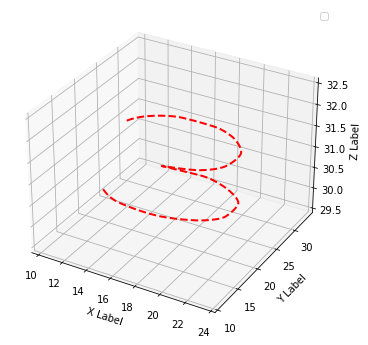

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set_theme(style="darkgrid")

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, '--r', linewidth=2)
ax.legend()
plt.axis('on')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [8]:
or_trajectories = torch.Tensor(np.array(or_tr)[:, :, :]).float()
or_trajectories.shape

torch.Size([20000, 301, 3])

In [9]:
# transform the images from 40x40 to 28x28
images_resize = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
outputs_resize = np.array([cv2.resize(img, (28, 28)) for img in outputs]) / 255.0
input_size = images_resize.shape[1] * images_resize.shape[2]

# to torch tensor
X_test = torch.Tensor(images_resize).float()
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
O_test = torch.Tensor(images_resize).float()

/Users/shengdaolin_sh/dir_install/Aanconda3/anaconda3/envs/env_msc_project_py38/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
<ipython-input-3-d251c861ed21>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


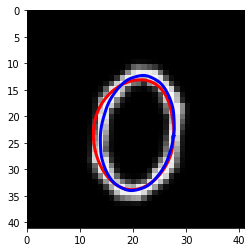

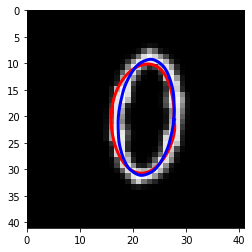

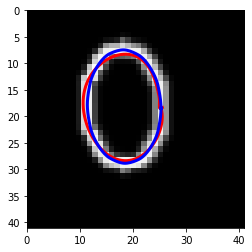

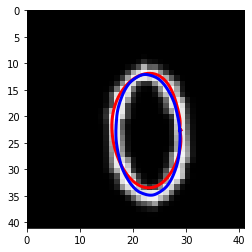

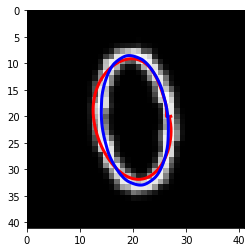

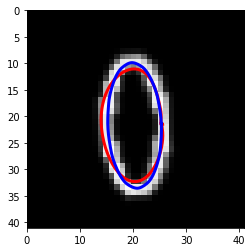

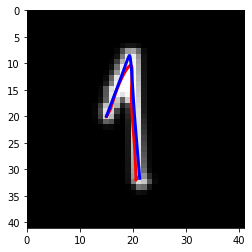

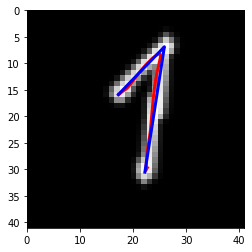

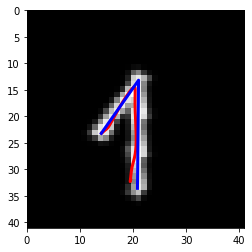

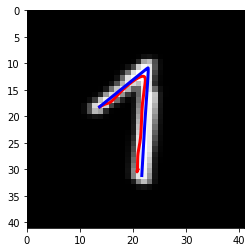

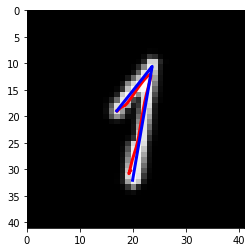

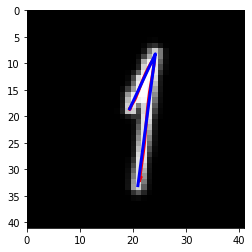

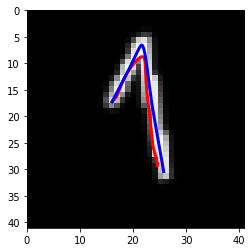

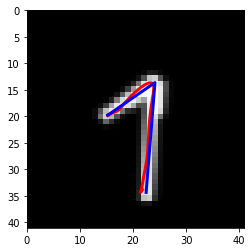

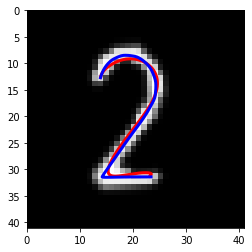

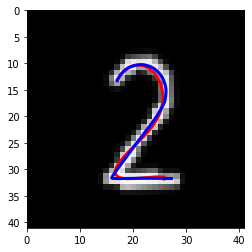

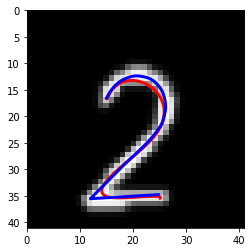

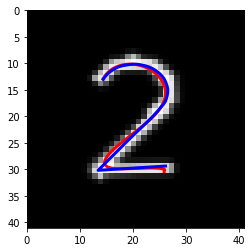

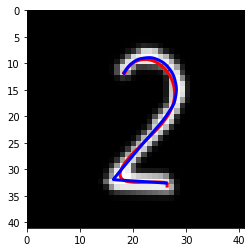

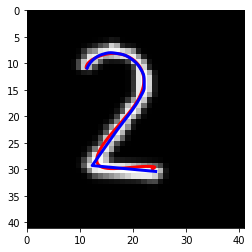

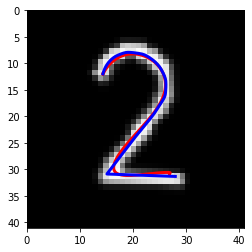

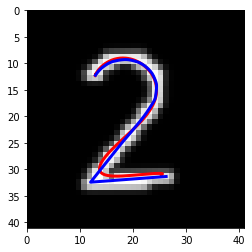

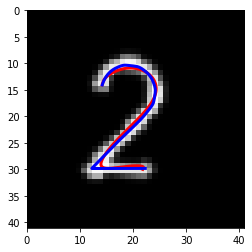

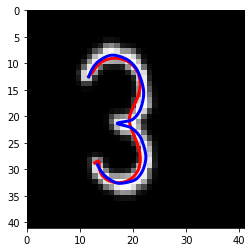

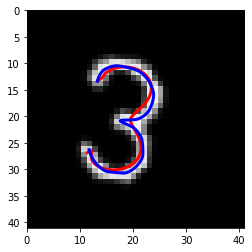

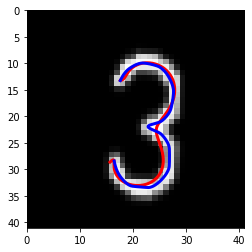

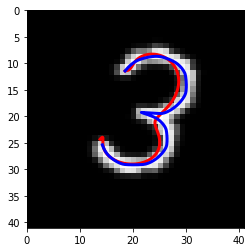

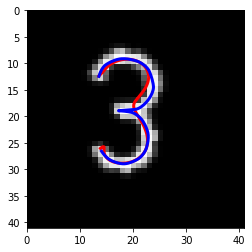

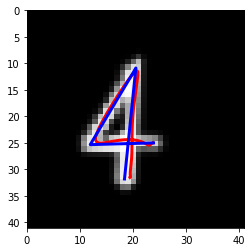

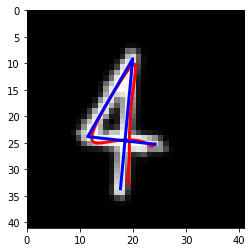

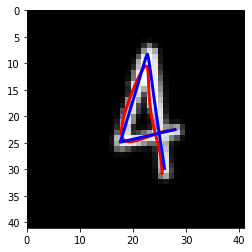

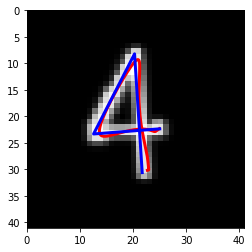

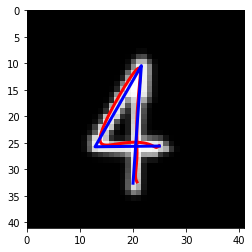

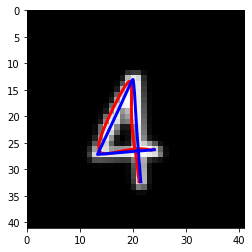

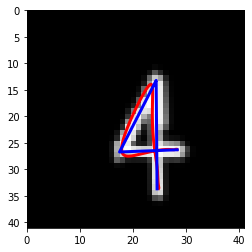

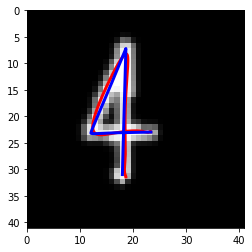

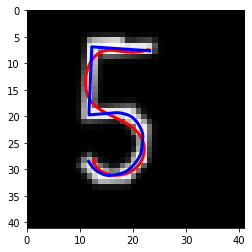

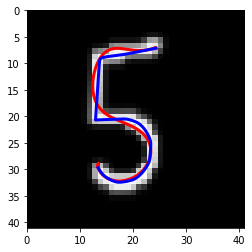

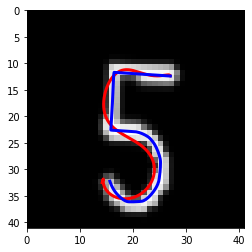

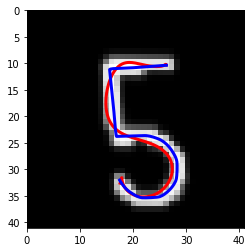

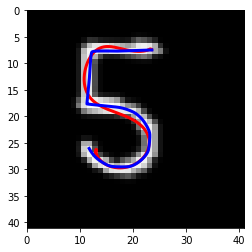

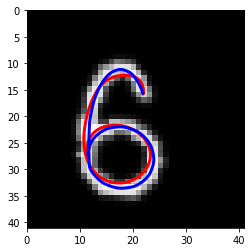

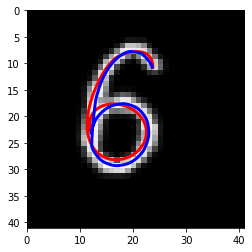

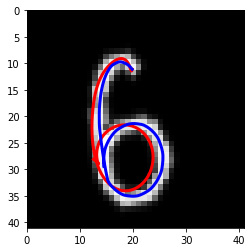

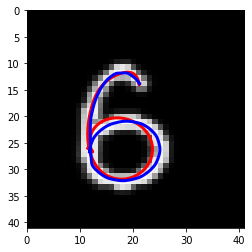

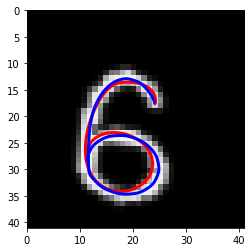

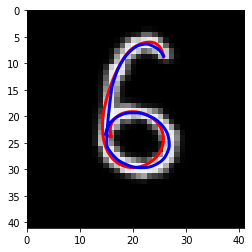

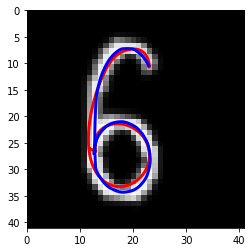

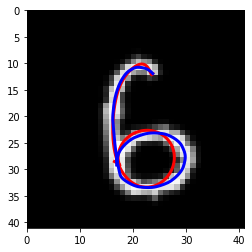

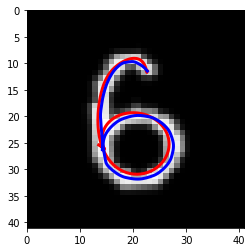

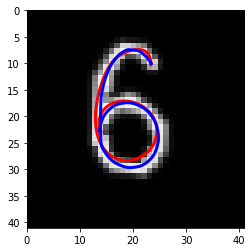

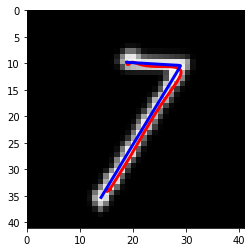

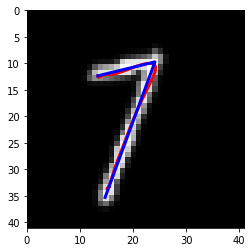

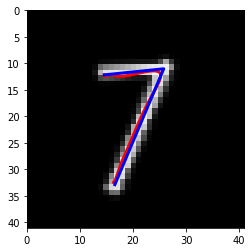

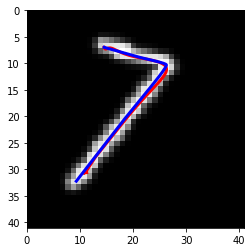

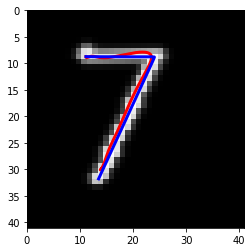

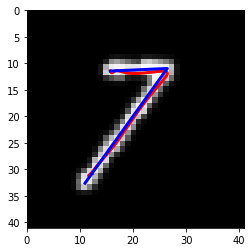

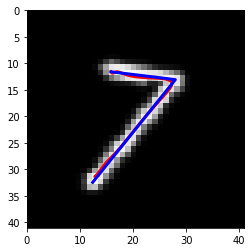

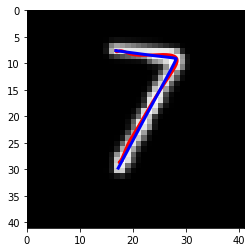

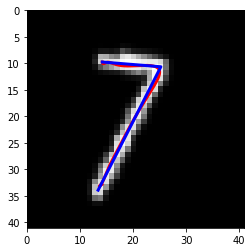

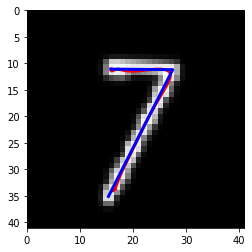

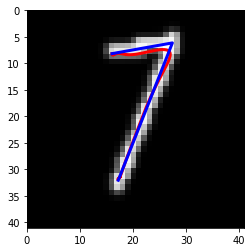

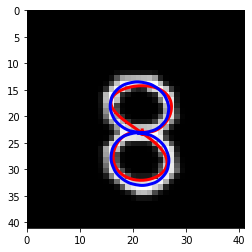

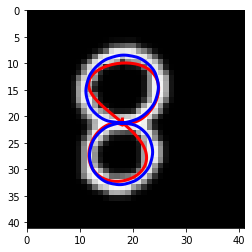

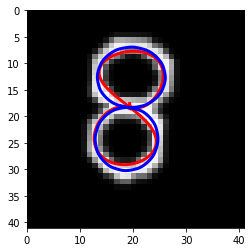

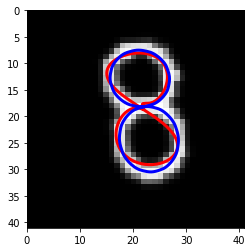

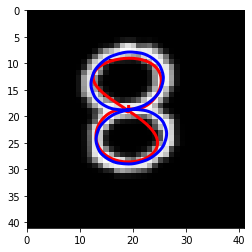

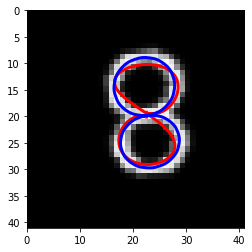

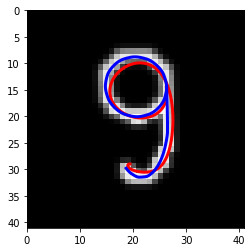

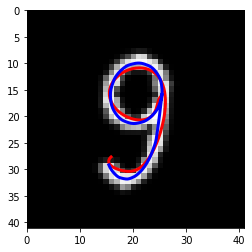

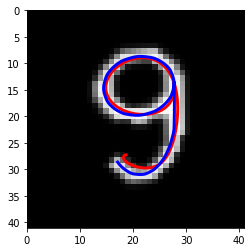

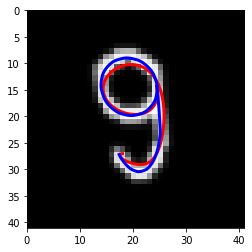

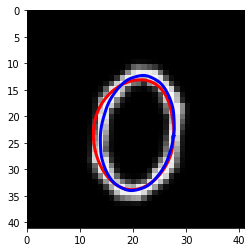

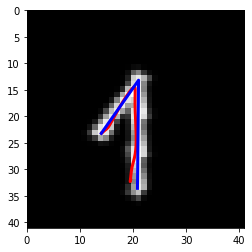

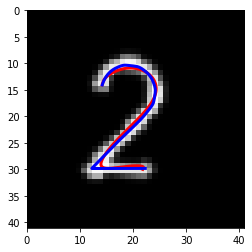

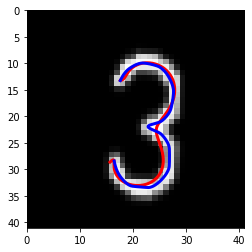

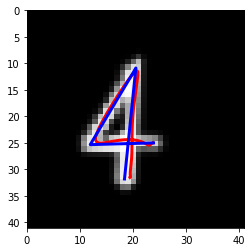

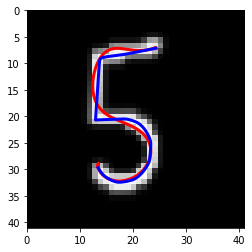

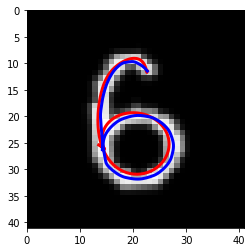

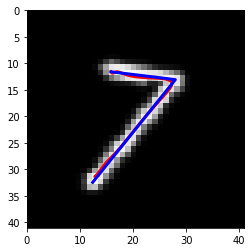

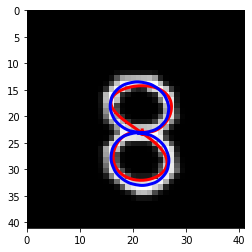

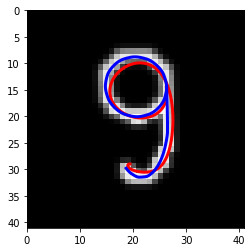

In [10]:
# loop for show the images
for i in range(0, len(digit_str)):
    digit = digit_str[i]
    test_sample_indices = test_samples[i]
    show_images('./images/cnn-ndp/nmnist', data_stub, digit, images, X_test, Y_test, test_sample_indices)

#### Gererate the predicted trajectories

In [10]:
test_sample_indices = test_samples[10]
predicted_tr = model(X_test[test_sample_indices], Y_test[test_sample_indices, 0, :])
predicted_tr = predicted_tr.detach().cpu().numpy()

or_tr_example = np.array(or_tr)[test_sample_indices]

/Users/shengdaolin_sh/dir_install/Aanconda3/anaconda3/envs/env_msc_project_py38/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [11]:
import math
predicted_tr_new = []
for i in range(0,len(test_sample_indices)):
    new_arr = []
    for j in range(0, len(predicted_tr[i])):
        x = -21.0
        x = x-x*math.sin(math.pi/4)
        
        y = -5-predicted_tr[i][j][0]
        y = y-y*math.sin(math.pi/4)
        
        z = predicted_tr[i][j][1]-10
        
        temp = [-x*2+20, y*2+15, -z*2+35]
        new_arr.append(temp)   
    predicted_tr_new.append(new_arr)

In [12]:
from scipy.io import savemat

mdic = {"orginal_tr": or_tr_example,"predicted_tr": predicted_tr_new}
savemat("trajectory_mnist_test.mat", mdic)

### 2, s-MNIST-AWGN

In [ ]:
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-awgn.mat')
data_stub = 'smnist_awgn'
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

In [ ]:
# transform the images from 40x40 to 28x28
images_resize = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
outputs_resize = np.array([cv2.resize(img, (28, 28)) for img in outputs]) / 255.0
input_size = images_resize.shape[1] * images_resize.shape[2]

# to torch tensor
X_test = torch.Tensor(images_resize).float()
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
O_test = torch.Tensor(images_resize).float()

In [ ]:
# loop for show the images
for i in range(0, len(digit_str)):
    digit = digit_str[i]
    test_sample_indices = test_samples[i]
    show_images('./images/cnn-ndp/nmnist', data_stub, digit, images, X_test, Y_test, test_sample_indices)

### 3, s-MNIST-MB

In [ ]:
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-motion-blur.mat')
data_stub = 'smnist_mb'
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

In [ ]:
# transform the images from 40x40 to 28x28
images_resize = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
outputs_resize = np.array([cv2.resize(img, (28, 28)) for img in outputs]) / 255.0
input_size = images_resize.shape[1] * images_resize.shape[2]

# to torch tensor
X_test = torch.Tensor(images_resize).float()
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
O_test = torch.Tensor(images_resize).float()

In [ ]:
# loop for show the images
for i in range(0, len(digit_str)):
    digit = digit_str[i]
    test_sample_indices = test_samples[i]
    show_images('./images/cnn-ndp/nmnist', data_stub, digit, images, X_test, Y_test, test_sample_indices)

### 4, s-MNIST-RC-AWGN

In [ ]:
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-reduced-contrast-and-awgn.mat')
data_stub = 'smnist_rc_awgn'
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

In [ ]:
# transform the images from 40x40 to 28x28
images_resize = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
outputs_resize = np.array([cv2.resize(img, (28, 28)) for img in outputs]) / 255.0
input_size = images_resize.shape[1] * images_resize.shape[2]

# to torch tensor
X_test = torch.Tensor(images_resize).float()
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
O_test = torch.Tensor(images_resize).float()

In [ ]:
# loop for show the images
for i in range(0, len(digit_str)):
    digit = digit_str[i]
    test_sample_indices = test_samples[i]
    show_images('./images/cnn-ndp/nmnist', data_stub, digit, images, X_test, Y_test, test_sample_indices)

### 5, Multi-MNIST

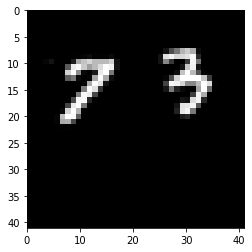

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
file_path = root_path + '/notebooks/data/m-mnist/double-mnist/'
images_path = ['1_10.png', '1_48.png', '1_59.png', '1_62.png', '1_73.png']
images1 = []
for i in range(0, len(images_path)):   
    img = mpimg.imread(file_path + images_path[i])
    img = cv2.resize(img,(40,40))
    images1.append(img)
    H, W = img.shape
    plt.imshow(img, cmap='gray', extent=[0, H+1, W+1, 0])
    
plt.show()

In [15]:
images = np.array([cv2.resize(img, (28, 28)) for img in images1]) / 255.0
X_test = torch.Tensor(images).float()
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
# Y_test = torch.ones([5,301, 2]).float()
test_sample_indices = [0, 1, 2, 3, 4]
# print(images.shape)
# X_test

In [16]:
a = [[10,10] , [8, 10], [16, 10], [10, 8], [27, 20]]
Y_test = torch.tensor(a)
Y_test

tensor([[10, 10],
        [ 8, 10],
        [16, 10],
        [10,  8],
        [27, 20]])

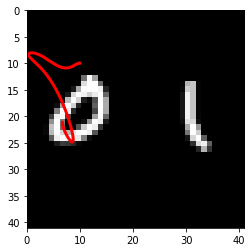

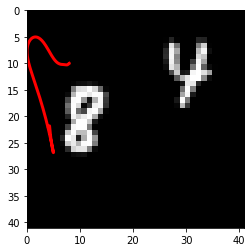

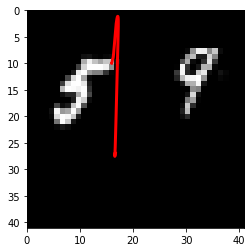

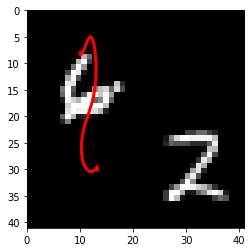

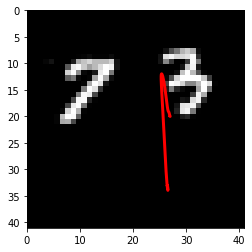

In [17]:
y_h = model(X_test[test_sample_indices], Y_test)
y_h
for i in range(0, len(test_sample_indices)):   
    plt.figure()
    image = images1[test_sample_indices[i]]
    H, W = image.shape
    plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
    plt.plot(y_h[i, :, 0].detach().cpu().numpy(),y_h[i, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
    plt.axis('on')
    plt.show()

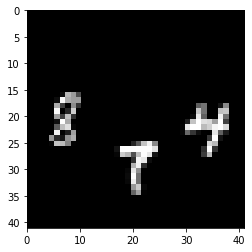

In [19]:
file_path = root_path + '/notebooks/data/m-mnist/triple-mnist/'
images_path = ['1_039.png', '1_146.png', '1_258.png', '1_512.png', '1_874.png']
images1 = []
for i in range(0, len(images)):   
    img = mpimg.imread(file_path + images_path[i])
    img = cv2.resize(img,(40,40))
    images1.append(img)
    H, W = img.shape
    plt.imshow(img, cmap='gray', extent=[0, H+1, W+1, 0])
    
plt.show()

In [21]:
images = np.array([cv2.resize(img, (28, 28)) for img in images1]) / 255.0
X_test = torch.Tensor(images).float()
test_sample_indices = [0, 1, 2, 3, 4]
print(images.shape)

(5, 28, 28)


In [22]:
a = [[8,5] , [7, 20], [4, 30], [10, 3], [6, 34]]
Y_test = torch.tensor(a)
Y_test

tensor([[ 8,  5],
        [ 7, 20],
        [ 4, 30],
        [10,  3],
        [ 6, 34]])

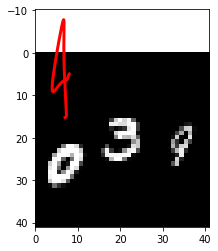

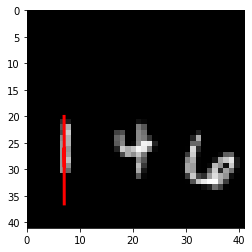

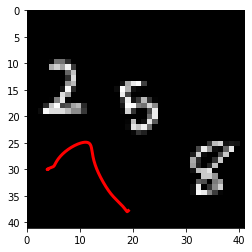

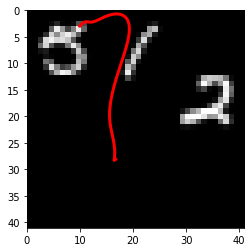

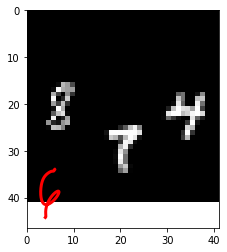

In [23]:
y_h = model(X_test[test_sample_indices], Y_test)
for i in range(0, len(test_sample_indices)):   
    plt.figure()
    image = images1[test_sample_indices[i]]
    H, W = image.shape
    plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
    plt.plot(y_h[i, :, 0].detach().cpu().numpy(),y_h[i, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
    plt.axis('on')
    plt.show()

### 6, e-MNIST

In [32]:
from emnist import list_datasets

In [33]:
list_datasets()
from emnist import extract_training_samples
from emnist import extract_test_samples
images, labels = extract_training_samples('letters')
print(images.shape)
print(labels.shape)
images, labels = extract_test_samples('letters')
print(images.shape)
print(labels.shape)

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


In [41]:
images0 = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
X_test = torch.Tensor(images0).float() / 1000
# print(X_test[0][:,10:15])
test_sample_indices = [381,1488,3270, 1068,6292, 8353, 1405, 18144, 9218, 20698, 4852, 6665, 20447,13588, 5402, 16128]
X_test.shape
a = [[10,24], [15,10],[38, 7], [26, 3], [16, 12], 
     [10,10], [16,6], [4,4], [30,5] , [5, 5], 
     [30, 13], [23, 3], [3, 13], [20,3], [25, 13], [15, 8]]
Y_test = torch.tensor(a)

In [42]:
Y_test

tensor([[10, 24],
        [15, 10],
        [38,  7],
        [26,  3],
        [16, 12],
        [10, 10],
        [16,  6],
        [ 4,  4],
        [30,  5],
        [ 5,  5],
        [30, 13],
        [23,  3],
        [ 3, 13],
        [20,  3],
        [25, 13],
        [15,  8]])

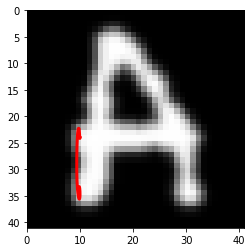

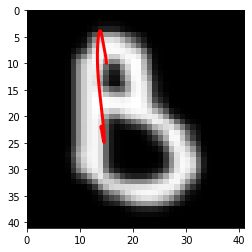

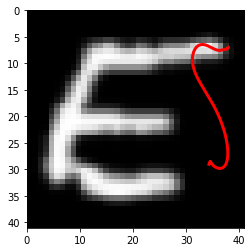

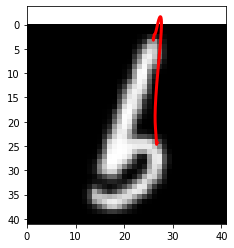

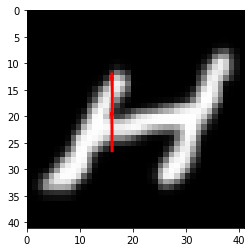

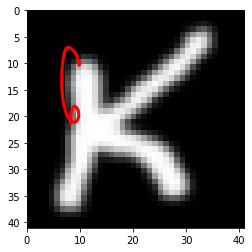

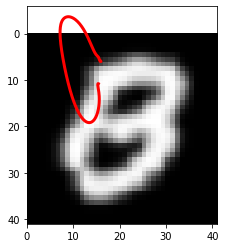

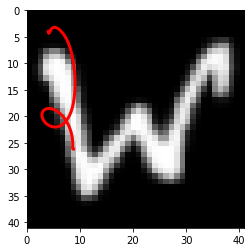

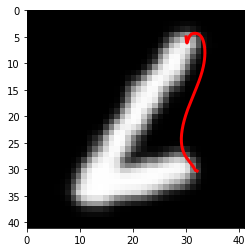

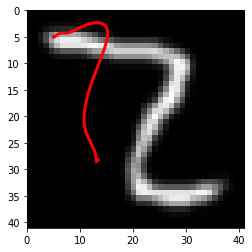

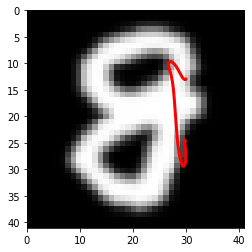

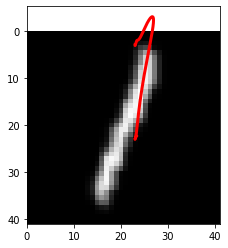

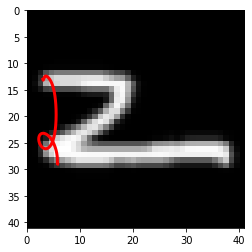

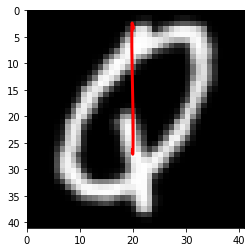

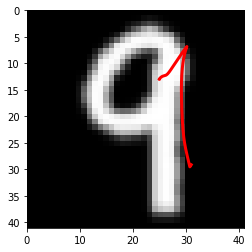

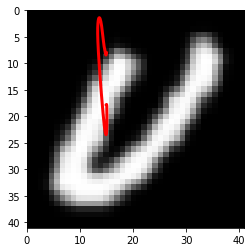

In [43]:
images1 = np.array([cv2.resize(img, (40, 40)) for img in images]) / 255.0
# print(images1[0][:,10:15])
y_h1 = model(X_test[test_sample_indices], Y_test)
# y_h1
for i in range(0, len(test_sample_indices)):   
    plt.figure()
    image1 = images1[test_sample_indices[i]]
    H, W = image1.shape
    plt.imshow(image1, cmap='gray', extent=[0, H+1, W+1, 0])
    plt.plot(y_h1[i, :, 0].detach().cpu().numpy(),y_h1[i, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
    plt.axis('on')
    plt.show()

## Evaluation on Different MNIST dataset

In [ ]:
import os
import sys
root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
print("root path:", root_path)
from imednet.imednet.data.smnist_loader import MatLoader, Mapping

In [ ]:
# 
def get_loss_values(t, test_samples):
    
    if t == 's-MNIST':
        data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist.mat')
        # data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-seed-42.mat')
        data_stub = 'smnist'

    elif t == 's-MNIST-AWGN':
        data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-awgn.mat')
        # data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-awgn-seed-42.mat')
        data_stub = 'smnist_awgn_9_5_snr'

    elif t == 's-MNIST-MB':
        data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-motion-blur.mat')
        # data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-motion-blur-seed-42.mat')
        data_stub = 'smnist_mb'

    elif t == 's-MNIST-RC-AWGN':
        data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-reduced-contrast-and-awgn.mat')
        # data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-reduced-contrast-and-awgn-seed-42.mat')
        data_stub = 'smnist_rc_awgn'
     
    # load the dataset
    images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)
    
    # transform the images from 40x40 to 28x28
    images_resize = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
    outputs_resize = np.array([cv2.resize(img, (28, 28)) for img in outputs]) / 255.0
    input_size = images_resize.shape[1] * images_resize.shape[2]

    # to torch tensor
    X_test = torch.Tensor(images_resize).float()
    Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
    
    data = []
    for s in test_samples:
        test_inds = np.arange(int(s))
        np.random.shuffle(test_inds)
        x_test = X_test[test_inds]
        y_test = Y_test[test_inds]
        cnn_y_htest  = model(x_test,  y_test[:, 0, :])
        cnn_test = ((cnn_y_htest - y_test) ** 2).mean(1).mean(1)
        data.append(round(cnn_test.mean().item(), 3))
    
    return data

In [ ]:
types = ['s-MNIST', 's-MNIST-AWGN', 's-MNIST-MB', 's-MNIST-RC-AWGN']
loss_values = []
test_samples = [50, 100, 200, 500, 1000, 2000]
for t in types:
    loss_value = get_loss_values(t, test_samples)
    loss_values.append(loss_value)
    
print(loss_values)  

In [ ]:
new_data = loss_values
new_data

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
sns.set_theme(style="darkgrid")
# sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,6))
N = 6
width = 0.15
ind = np.arange(N) 

sns.set_palette("tab10")
# sns.set_palette("hls")

plt.bar(ind-2*width, new_data[0], width, label='s-MNIST')
plt.bar(ind-width, new_data[1],  width, label='s-MNIST-AWGN')
plt.bar(ind, new_data[2], width, label='s-MNIST-MB')
plt.bar(ind+width, new_data[3], width, label='s-MNIST-RC-AWGN')

ax = plt.subplot()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    
plt.ylabel('Loss Value', fontsize='12')
plt.xlabel('Test Examples', fontsize='12')
plt.yticks(np.arange(0, 35, 2))
plt.xticks(ind + width / 2, ('50', '100', '200', '500', '1000', '2000'))
plt.legend(loc='upper right')
plt.show()